<a href="https://colab.research.google.com/github/Vortue/ML_HW_1/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries to perform non-standard operations
import numpy as np
import pandas as pd
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import seoul bike sharing dataset that I publicly hosted on Github
df = pd.read_csv('https://raw.githubusercontent.com/Vortue/ML_HW_1/main/SeoulBikeData.csv')

In [ ]:
#remove null values
df = df.dropna()

In [ ]:
#remove duplicates
df = df.drop_duplicates()

In [ ]:
#stlye the future plots with ggplot and get information about the columns
plt.style.use(['ggplot'])
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(Celsius)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(Celsius)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

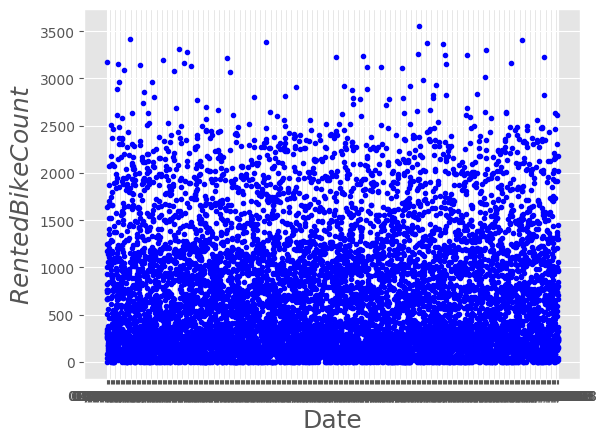

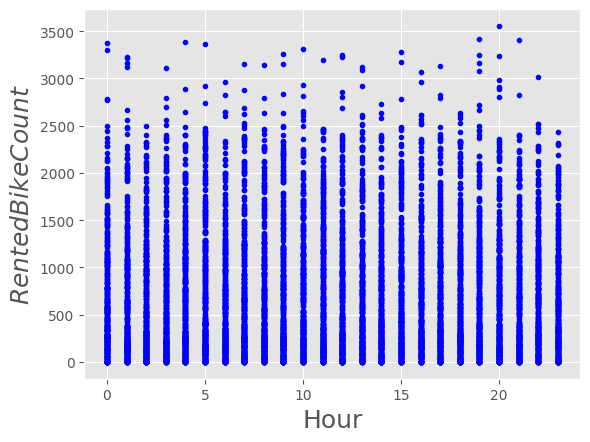

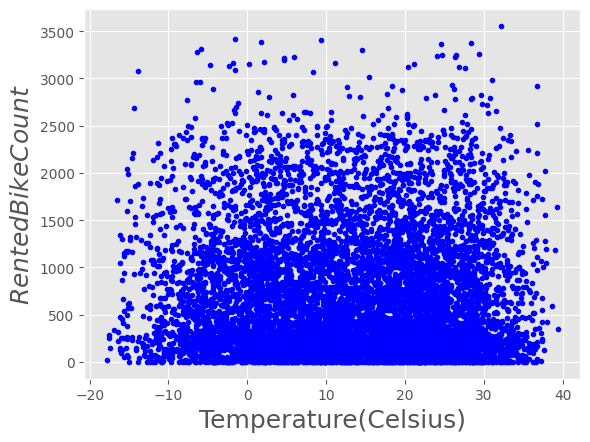

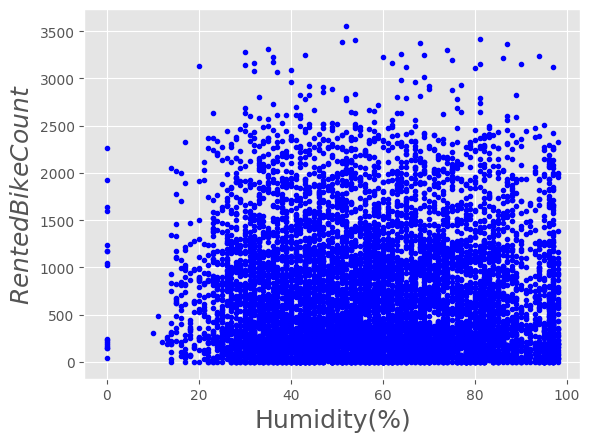

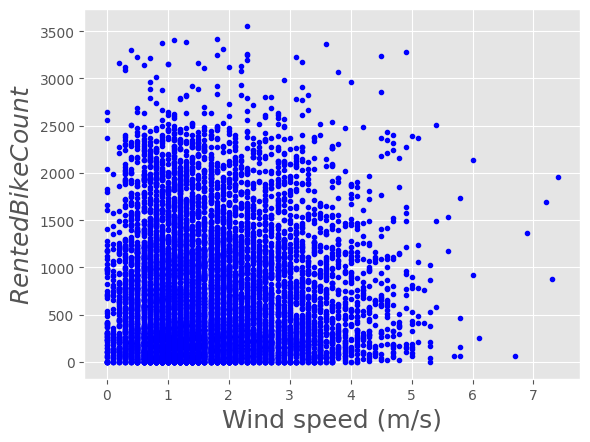

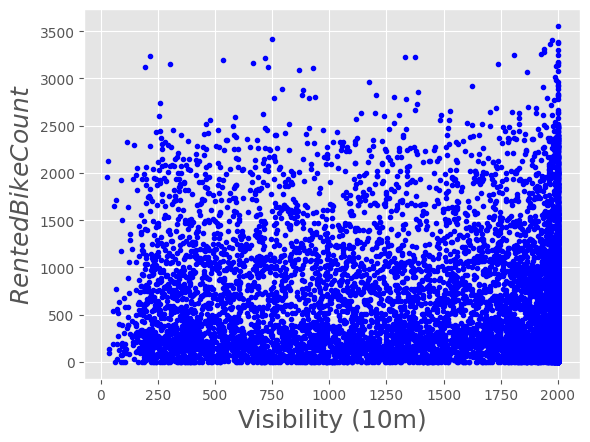

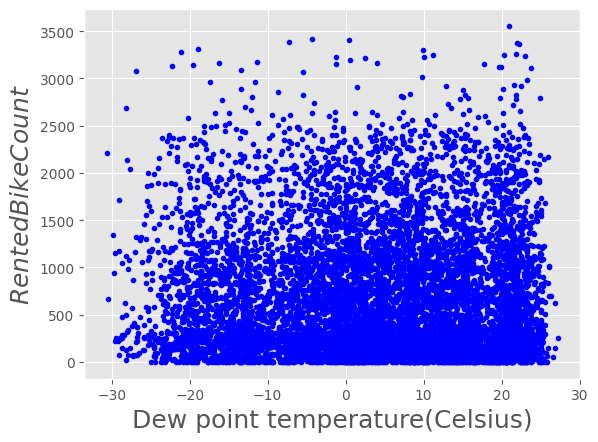

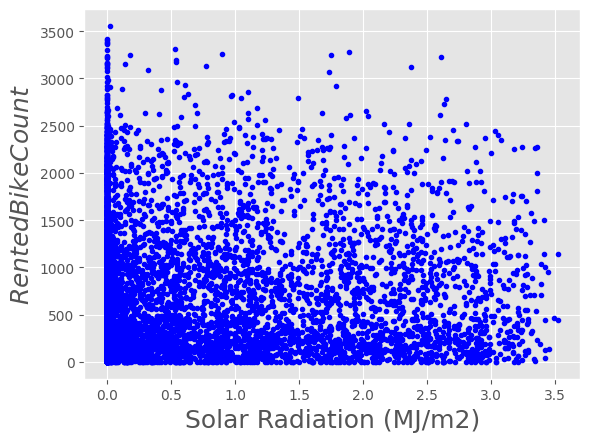

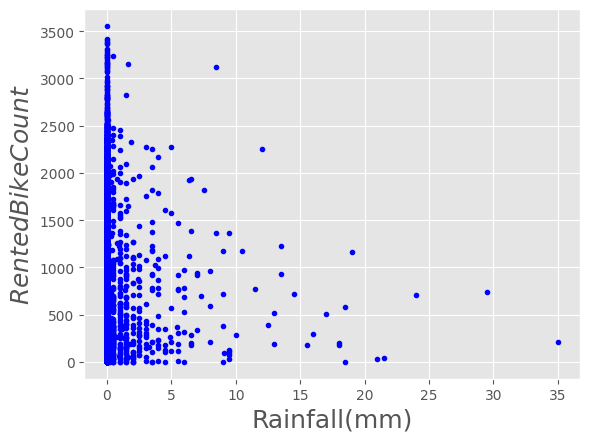

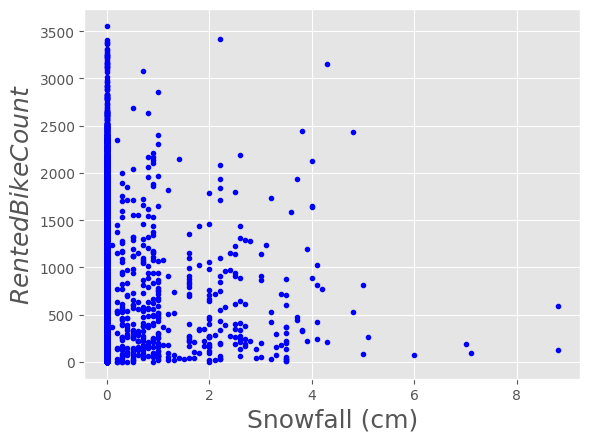

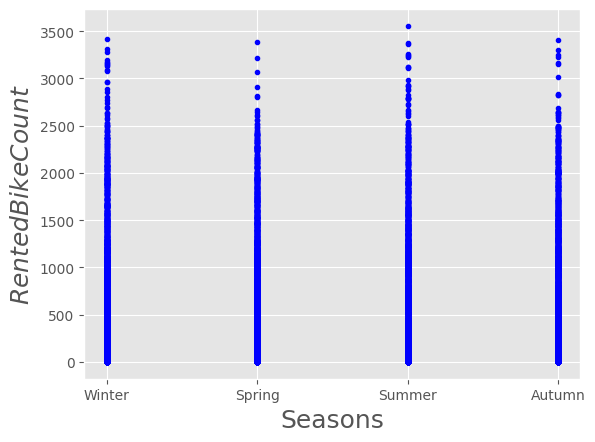

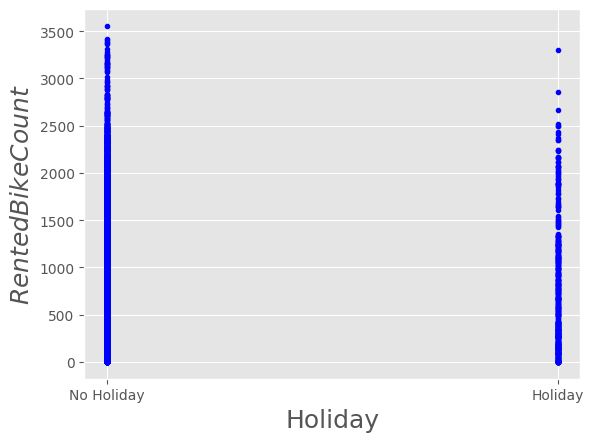

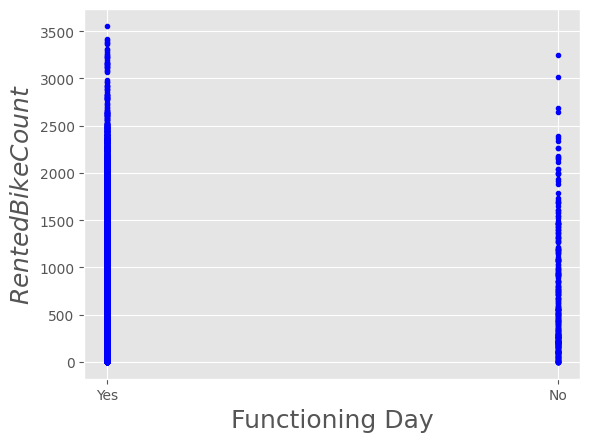

In [ ]:
#to select the features that would give the best predictions for the target, plot the relationship between each attribute and the target to identify trends
for column in df:
  if (column != 'Rented Bike Count'):
    plt.plot(df[column],bike_count, '.b')
    plt.xlabel(column, fontsize=18)
    plt.ylabel("$Rented Bike Count$", fontsize=18)
    plt.show()

In [ ]:
#check whether the holiday and functioning day attributes are equivalent
df[(df['Functioning Day']== 'Yes') & (df['Holiday'] == 'Holiday')]

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
504,22/12/2017,196,0,-1.7,79,0.5,794,-4.8,0.0,0.0,0.8,Winter,Holiday,Yes
505,22/12/2017,250,1,-1.6,79,0.6,784,-4.7,0.0,0.0,0.8,Winter,Holiday,Yes
506,22/12/2017,161,2,-1.1,79,0.7,736,-4.2,0.0,0.0,0.8,Winter,Holiday,Yes
507,22/12/2017,99,3,-0.6,76,0.5,789,-4.3,0.0,0.0,0.7,Winter,Holiday,Yes
508,22/12/2017,64,4,-0.3,76,0.9,760,-4.0,0.0,0.0,0.7,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,03/10/2018,1792,19,20.0,49,1.5,2000,8.9,0.0,0.0,0.0,Autumn,Holiday,Yes
7364,03/10/2018,1744,20,18.6,55,1.5,2000,9.3,0.0,0.0,0.0,Autumn,Holiday,Yes
7365,03/10/2018,1594,21,17.6,59,1.6,2000,9.4,0.0,0.0,0.0,Autumn,Holiday,Yes
7366,03/10/2018,1393,22,16.9,63,0.2,2000,9.8,0.0,0.0,0.0,Autumn,Holiday,Yes


In [ ]:
#since there were no bike rentals on non-functioning days according to the graph, vefiry that non-functioning days are included in the dataset
df[(df['Functioning Day']== 'No')]

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [ ]:
#drop the features whose columns show a weak correlation to the target according to the graphs
df = df.drop(['Date','Dew point temperature(Celsius)', 'Solar Radiation (MJ/m2)', 'Wind speed (m/s)', 'Visibility (10m)', 'Humidity(%)'], axis = 1)

In [ ]:
#convert the categorical data to numeric data
df['Seasons'].replace(['Winter', 'Spring', 'Summer', 'Autumn'], [1, 2, 3, 4], inplace=True)
df['Holiday'].replace(['No Holiday', 'Holiday'], [1, 2], inplace=True)
df['Functioning Day'].replace(['Yes', 'No'], [1, 2], inplace=True)

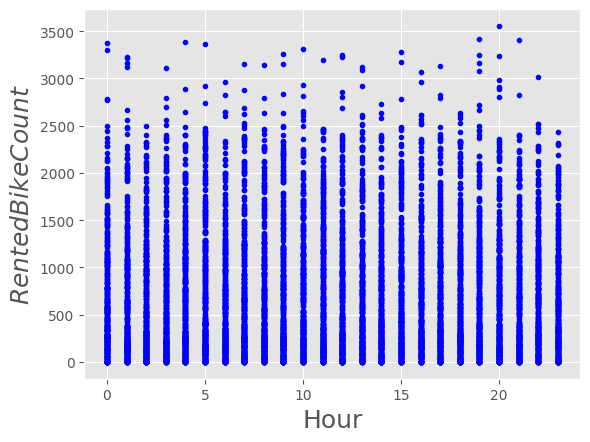

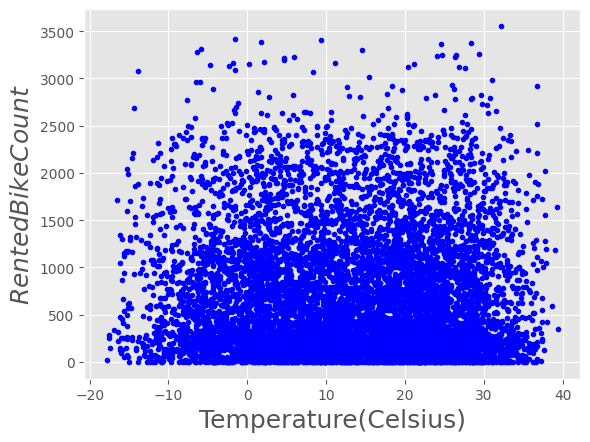

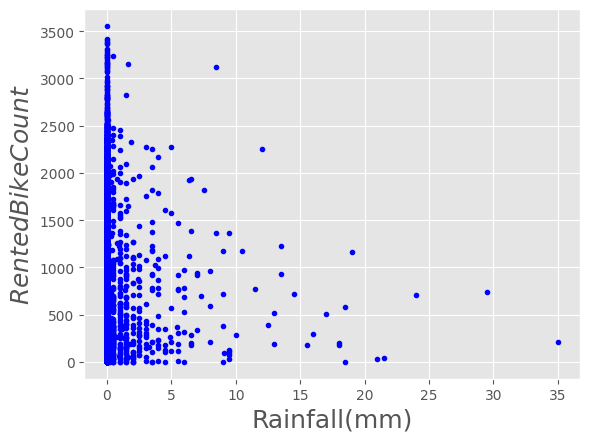

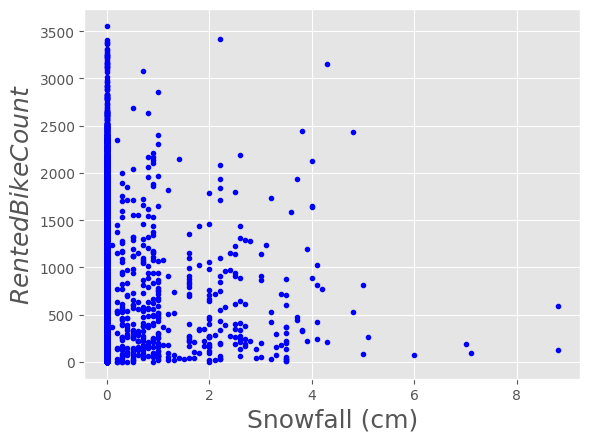

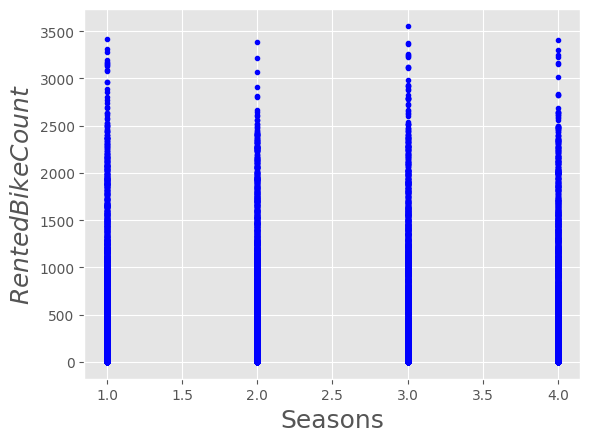

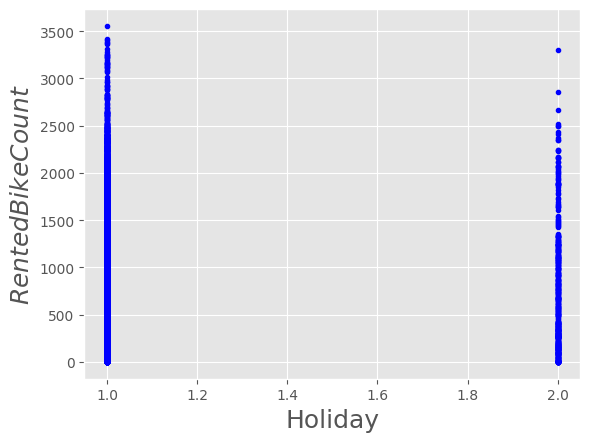

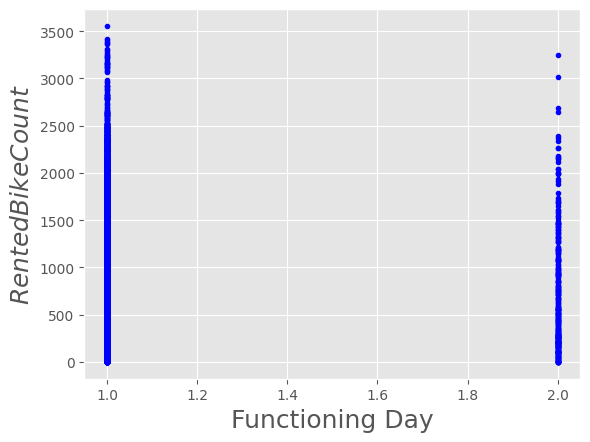

In [ ]:
#analyze the features again
for column in df:
  if (column != 'Rented Bike Count'):
    plt.plot(df[column],bike_count, '.b')
    plt.xlabel(column, fontsize=18)
    plt.ylabel("$Rented Bike Count$", fontsize=18)
    plt.show()

In [ ]:
#separate the data into training and testing sets
df = df.sample(frac = 1)
df

,Rented Bike Count,Hour,Temperature(Celsius),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8235,0,3,10.8,0.5,0.0,4,1,2
4027,29,19,22.3,0.0,0.0,2,1,1
8632,872,16,9.5,0.0,0.8,4,1,1
3852,0,12,19.8,0.0,0.0,2,1,2
847,327,7,-5.3,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...
7356,1634,12,21.4,0.0,0.0,4,2,1
799,308,7,-6.9,0.0,0.0,1,1,1
3679,1160,7,8.4,0.0,0.0,2,1,1
5099,11,11,21.2,18.5,0.0,3,1,1


In [ ]:
train = int(0.8 * df.shape[0])

test = df[train:]
train = df[:train]

In [ ]:
#extract the target column from the datasets
bike_count_train = train['Rented Bike Count']
train = train.drop(['Rented Bike Count'], axis=1)

bike_count_test = test['Rented Bike Count']
test = test.drop(['Rented Bike Count'], axis=1)

In [ ]:
  # generic minimization method covered in class
  def gradient_descent(
      gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
  ):
    vector = start
    for _ in range(n_iter):
      diff = -learn_rate * np.array(gradient(x, y, vector))
      if np.all(np.abs(diff) <= tolerance):
        break
      vector += diff
    return

    #my custom rss gradient function (will be a parameter to the gradient_descent function)
  #x is the dataframe representing my training set, y is a vector with the actual values of the target variable, and w is the weights vector
  def my_gradient(x,y,w):
      #create a temporary dataframe to hold the training data with a column full of 1s for the dot product with the weights vector
      temp = cp.deepcopy(x)#used the copy library to perform a deep copy
      temp.insert(0, "w0", 1)#inserted a column for the base weight
      #the dot product of the weights and the training data gives the predicted values, and subtracting the actual values from those gives the residual
      res = (temp.dot(w)) - y
      #array to hold the partial derivatives with respect to each feature
      res_array = []
      #iterate through the features, adding the partial derivative of each one to the array
      for i in temp:
        res_array.append((res * temp[i]).mean())
      #return the array
      return res_array,

    #get the weights for the model
  def get_weights(x,y,z):
      return Model.gradient_descent(Model.my_gradient, x, y, z)

  #calculate MSE
  def calc_mse(x,y,z):
    error = np.array(Model.my_gradient(x, y, z))
    squared_error = np.square(error)
    MSE = squared_error.mean()
    return MSE


In [ ]:
#trial 1
start = [10,10,10,10,10,10,10,10]
weights = gradient_descent(my_gradient, train, bike_count_train, start)
print(weights)

#calculate MSE
error = np.array(my_gradient(train, bike_count_train, weights))
squared_error = error * error
MSE = squared_error.mean()
print(MSE)

ValueError: ignored

In [ ]:
#function that combines the linear regression on the data with the performance metric
def trial(learn_rate=0.1, n_iter=50, tolerance=1e-06):
  #get the weights of the features
  start = [10,10,10,10,10,10,10,10]
  weights = gradient_descent(my_gradient, train, bike_count_train, start, learn_rate, n_iter, tolerance)

  #calculate MSE
  error = np.array(my_gradient(train, bike_count_train, weights))
  squared_error = error * error
  MSE = squared_error.mean()
  return MSE

In [ ]:
#determine a good learning rate by plotting different learning rates against the mean squared error
#the error seems to plateau around learn_rate = 0.2, so any value below that should be good
learn_rate = 0.5 #learning rate that will be adjusted each trial
rate = [] #store the learning rates
results = [] #store the MSEs

#do 50 trials, saving the learning rate and MSE of each trail and halving the learning rate each time
for i in range (50):
  rate.append(learn_rate)
  results.append(trial(learn_rate))
  learn_rate /= 2

#plot the results
plt.plot(rate, results)
plt.xlim(0,1)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
#determine a good number of iteration by plotting different numbers of iterations against the mean squared error
learn_rate = 0.0002 #learning rate from previous step (because of integer overflow, I am choosing a small value)
n_iter = 5 # number of iterations
iterations = [] #store the number of iterations
results = [] #store the MSEs

#do ten trials, doubling the number of iterations each time
for i in range (10):
  iterations.append(n_iter)
  results.append(trial(learn_rate, n_iter))
  n_iter *= 2

#plot the results
plt.plot(iterations, results)
plt.xlim(0,100)
plt.xlabel('No. Iterations')
plt.ylabel('Mean Squared Error')
plt.show()
#the error seems to be approach 0 around 80 iterations

In [ ]:
start = [10,10,10,10,10,10,10,10]
weights = gradient_descent(my_gradient, train, bike_count_train, start, 0.0002, 80)
print(weights)

#calculate MSE
error = np.array(my_gradient(train, bike_count_train, weights))
squared_error = error * error
MSE = squared_error.mean()
print(MSE)

#the error here was a lot worse, so the value I chose for the learning was too small; I will try increasing it

In [ ]:
#determine a good number of iteration by plotting different numbers of iterations against the mean squared error
learn_rate = 0.1 #learning rate from previous step (because of integer overflow, I am choosing a small value)
n_iter = 5 # number of iterations
iterations = [] #store the number of iterations
results = [] #store the MSEs

#do ten trials, doubling the number of iterations each time
for i in range (10):
  iterations.append(n_iter)
  results.append(trial(learn_rate, n_iter))
  n_iter *= 2

#plot the results
plt.plot(iterations, results)
plt.xlim(0,100)
plt.xlabel('No. Iterations')
plt.ylabel('Mean Squared Error')
plt.show()
#the error seems to be approach 0 around 40 iterations
#the current parameters seem to work well so I will go ahead with these

In [ ]:
#use the tweaked parameters to estimate the weights for the training set
learn_rate = 0.0001
n_iter = 80

start = [10,10,10,10,10,10,10,10]
weights = gradient_descent(my_gradient, train, bike_count_train, start, learn_rate, n_iter)
print(weights)

#calculate training MSE
error = np.array(my_gradient(train, bike_count_train, weights))
squared_error = np.square(error)
MSE = squared_error.mean()
print('the mean squared error is: ' , MSE)
print('the root mean squared error is: ' , np.sqrt(MSE))

#this appears to be the best MSE yet, so hopefully the model is not overfitted

#calculate the training r^2
tss= np.array([(x - bike_count_train.mean()) for x in bike_count_train])
tss = tss * tss
tss = tss.sum()
r_2 = 1 - (squared_error.sum()/tss)
print('The R^2 value is: ', r_2)
#the r^2value is really high, so that shows that the model is good at predicting the target

In [ ]:
#calculate test MSE
error = np.array(my_gradient(test, bike_count_test, weights))
squared_error = np.square(error)
MSE = squared_error.mean()
print('the mean squared error is: ' , MSE)
print('the root mean squared error is: ' , np.sqrt(MSE))


#calculate the test r^2
tss= np.array([(x - bike_count_test.mean()) for x in bike_count_test])
tss = tss * tss
tss = tss.sum()
r_2 = 1 - (squared_error.sum()/tss)
print('The R^2 value is: ', r_2)
#the r^2value is really high, so that shows that the model is good at predicting the target